<a href="https://colab.research.google.com/github/Omnikutti/LGMVIP-DataScience-4/blob/main/Stock_marketipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 <!-- STOCK MARKET PREDICTION AND CLASSIFICATION Using Pandas and Numpy  -->





In [15]:
**STOCK MAEKET PREDICTION USING PANDAS AND NUMPY**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import math
from sklearn.metrics import mean_squared_error


In [3]:
# Load the dataset
df = pd.read_csv('/content/AAPL.csv')

In [4]:
# Preprocess the data
df1 = df['close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(df1)

In [5]:
# Split dataset into train and test
training_size = int(len(df1) * 0.75)
train_data, test_data = df1[0:training_size, :], df1[training_size:len(df1), :1]

*Here dataset is split such that 75% is used for training the model while remaining 25% is used for testing purpose.*

In [6]:
# Function to convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [7]:
# Reshape the data into X=t, t+1, t+2, t+3, and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [8]:
# Reshape input to be [samples, time steps, features] required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [9]:
# Create the Stacked LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


In [10]:
# Train the model
model.fit(X_train, y_train, validation_data=(X_test, ytest), epochs=10, batch_size=64, verbose=1)

Epoch 1/10
14/14 [==============================] - 12s 354ms/step - loss: 0.0202 - val_loss: 0.0903
Epoch 2/10
14/14 [==============================] - 3s 224ms/step - loss: 0.0039 - val_loss: 0.0189
Epoch 3/10
14/14 [==============================] - 3s 212ms/step - loss: 0.0016 - val_loss: 0.0080
Epoch 4/10
14/14 [==============================] - 3s 209ms/step - loss: 0.0013 - val_loss: 0.0076
Epoch 5/10
14/14 [==============================] - 3s 252ms/step - loss: 9.7095e-04 - val_loss: 0.0078
Epoch 6/10
14/14 [==============================] - 3s 238ms/step - loss: 9.0932e-04 - val_loss: 0.0082
Epoch 7/10
14/14 [==============================] - 3s 208ms/step - loss: 8.5430e-04 - val_loss: 0.0071
Epoch 8/10
14/14 [==============================] - 3s 211ms/step - loss: 8.4055e-04 - val_loss: 0.0079
Epoch 9/10
14/14 [==============================] - 4s 257ms/step - loss: 7.5608e-04 - val_loss: 0.0085
Epoch 10/10
14/14 [==============================] - 3s 241ms/step - loss: 7.10

In [11]:

# Make predictions and transform back to the original form
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

7/7 [==============================] - 0s 40ms/step


In [12]:
# Calculate RMSE performance metrics
train_rmse = math.sqrt(mean_squared_error(y_train, train_predict))
test_rmse = math.sqrt(mean_squared_error(ytest, test_predict))
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

Train RMSE: 151.27760966784237
Test RMSE: 249.01830385924748


In [13]:
# Shift train predictions for plotting
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict



In [14]:
# Shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2) + 1:len(df1) - 1, :] = test_predict



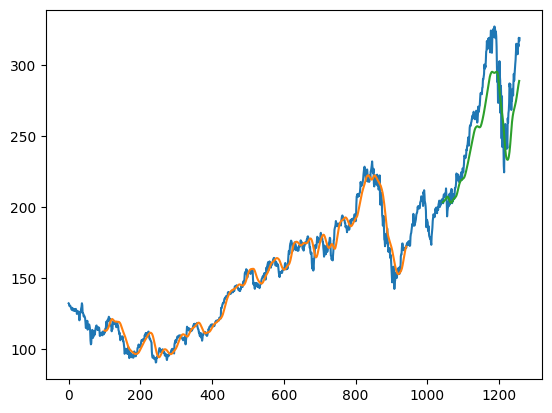

In [15]:
# Plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()